# Import necessary libraries

In [347]:
#Import necessary libraries
import numpy as np # Numerical python
import pandas as pd # Used for reading pd files
import seaborn as sns # Statistical Graphics
%matplotlib inline
from matplotlib import pyplot as plt # Plotting library
from sklearn.svm import SVC, LinearSVC # Model 1 Machine Learning
from sklearn.tree import DecisionTreeClassifier # Model 2 Machine Learning 
from tensorflow.keras.models import Sequential # Model 3 Neural Network
from tensorflow.keras.layers import Dense # Classification of output
from numpy import loadtxt

import os 
import warnings
warnings.filterwarnings('ignore') # To avoid the appearance of errors

# Load the training and testing dataset

In [348]:
training = pd.read_csv("train.csv") # Reading the training data
testing = pd.read_csv("test.csv") # Reading the test data
std = pd.concat([train_df, test_df], axis=0, sort=True) # Combine the training and testing data

In [349]:
training.info() # Display the statistical data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Validation of datasets

In [350]:
# Checking for the null values in the training dataset
total = training.isnull().sum().sort_values(ascending=False)
percent_1 = training.isnull().sum()/training.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
# Display the training dataset and the null values
missing_data.head(5)  

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [351]:
training.columns.values # Display the columns in a List of array

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

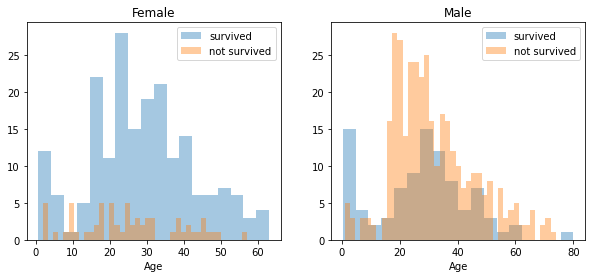

In [352]:
# Data visualization for the training data
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = training[training['Sex']=='female']
men = training[training['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [353]:
data = [training, testing]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
training['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

# Dropping of unwanted columns in the training dataset

In [354]:
# Dropping the unwanted columns of Passengers
training = training.drop(['PassengerId'], axis=1) 

In [355]:
# Dropping the unwanted column of Cabin 
training = training.drop(['Cabin'], axis=1)
testing = testing.drop(['Cabin'], axis=1)

In [356]:
data = [training, testing]

for dataset in data:
    mean = training["Age"].mean()
    std = testing["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    rand_age = np.random.randint(mean - std, mean + std, size = is_null) # Computation of random numbers between std, mean and is_null
    
    # Filling up the Age Column NaN values 
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = training["Age"].astype(int)
training["Age"].isnull().sum()

0

In [357]:
# Print Embarked Column Values
training['Embarked'].describe() 

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [358]:
common_value = 'S'
data = [training, testing]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [359]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
dtypes: float64(1), int32(2), int64(5), object(4)
memory usage: 76.7+ KB


In [360]:
data = [training, testing]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [361]:
data = [training, testing]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # Input of the Title
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # Title replacement of more accurate datanames
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    # Conversion of Titles into Numerical Values
    dataset['Title'] = dataset['Title'].map(titles)
    
    # NaN with the 0 values
    dataset['Title'] = dataset['Title'].fillna(0)
training = training.drop(['Name'], axis=1)
testing = testing.drop(['Name'], axis=1)

In [362]:
genders = {"male": 0, "female": 1}
data = [training, testing]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [363]:
training['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [364]:
training = training.drop(['Ticket'], axis=1)
testing = testing.drop(['Ticket'], axis=1)

In [365]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [training, testing]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [366]:
data = [training, testing]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [367]:
# Print of the dataset for validation of Age column
training.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,0,3,0,2,1,0,7,0,1,0,1
1,1,1,1,5,1,0,71,1,1,0,3
2,1,3,1,3,0,0,7,0,0,1,2
3,1,1,1,5,1,0,53,0,1,0,3
4,0,3,0,5,0,0,8,0,0,1,1
5,0,3,0,4,0,0,8,2,0,1,1
6,0,1,0,6,0,0,51,0,0,1,1
7,0,3,0,0,3,1,21,0,4,0,4
8,1,3,1,3,0,2,11,0,2,0,3
9,1,2,1,1,1,0,30,1,1,0,3


In [368]:
data = [training, testing]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [369]:
data = [training, testing]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [370]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

# Print of the dataset for validation of Fare column
training.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,5,1
2,1,3,1,3,0,0,0,0,0,1,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,5,1
4,0,3,0,5,0,0,1,0,0,1,1,15,1
5,0,3,0,4,0,0,1,2,0,1,1,12,1
6,0,1,0,6,0,0,3,0,0,1,1,6,3
7,0,3,0,0,3,1,2,0,4,0,4,0,0
8,1,3,1,3,0,2,1,0,2,0,3,9,0
9,1,2,1,1,1,0,2,1,1,0,3,2,1


# Splitting of the data

In [371]:
X_train = training.drop("Survived", axis=1)
Y_train = training["Survived"]
X_test  = testing.drop("PassengerId", axis=1).copy()

# Support Vector Machine for the 1st model

In [397]:
# Evaluating the First model SVM
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

# Inputting the data to start the algorithm training
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print("Accuracy of SVM model:", acc_linear_svc) 

Accuracy of SVM model: 80.7


# Decision Tree for the 2nd Model

In [398]:
# Evaluating the Second model Decision Tree Model
decision_tree = DecisionTreeClassifier()                                        

# Inputting the data to start the algorithm training
decision_tree.fit(X_train, Y_train)  

Y_pred = decision_tree.predict(X_test) 

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("Accuracy of Decision Tree:", acc_decision_tree) 

Accuracy of Decision Tree: 90.8


In [387]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[481,  68],
       [104, 238]], dtype=int64)

In [388]:
# Print array evaluated by the 1st model
Y_prediction

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [389]:
# Print array evaluated by the 2nd model
Y_predictionn

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,

# Neural Networks for the 3rd model

In [390]:
# Define the Keras model
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='sigmoid'))

# Use input shape as (8,) because there are 8 features that we need
model.add(Dense(12, input_shape=(8,), activation='relu')) 

# The Hidden Layer
model.add(Dense(8, activation='relu'))

# The Output layer (1 output for classification in this case)
model.add(Dense(1, activation='sigmoid')) 

In [391]:
# Compiling the Keras Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Adjustment for model weights training

In [392]:
# Fitting the Keras Model on the dataset
model.fit(X_train, Y_train, epochs=150, batch_size=10) # Training of the neural network

Epoch 1/150
90/90 [==============================] - 1s 2ms/step - loss: 0.6419 - accuracy: 0.6139
Epoch 2/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5303 - accuracy: 0.7441
Epoch 3/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.7789
Epoch 4/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.8002
Epoch 5/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4540 - accuracy: 0.8058
Epoch 6/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4481 - accuracy: 0.8047
Epoch 7/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4491 - accuracy: 0.8047
Epoch 8/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.8070
Epoch 9/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.8148
Epoch 10/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.8070
Epoch 11/

90/90 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8305
Epoch 84/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4011 - accuracy: 0.8294
Epoch 85/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4052 - accuracy: 0.8272
Epoch 86/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8305
Epoch 87/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8339
Epoch 88/150
90/90 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.8373
Epoch 89/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.8316
Epoch 90/150
90/90 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8339
Epoch 91/150
90/90 [==============================] - 0s 1ms/step - loss: 0.3960 - accuracy: 0.8406
Epoch 92/150
90/90 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.8328
Epoch 93/150


In [393]:
NN, accuracy = model.evaluate(X_train, Y_train)
print('Accuracy of Neural Networks: %.2f' % round(accuracy*100))

28/28 [==============================] - 0s 1ms/step - loss: 0.3980 - accuracy: 0.8316
Accuracy of Neural Networks: 83.00


In [394]:
predictions = (model.predict(X_train) > 0.5).astype(int)

28/28 [==============================] - 0s 960us/step


# Evaluation of the used models

In [395]:
results = pd.DataFrame({
    'Model': ['SVM', 'Decision Tree', 'Neural Networks'],
    'Accuracy': [acc_linear_svc,acc_decision_tree,accuracy]})
result_df = results.sort_values(by='Accuracy', ascending=False)
result_df = result_df.set_index('Accuracy')
result_df.head(10)

,Model
Accuracy,
90.80000,Decision Tree
81.26000,SVM
0.83165,Neural Networks


In [396]:
# The models that have been used show that the Decision Tree has the highest accuracy compared to the two models, which are the 
# SVM and Neural Networks. Also, removing the features such as the Cabin and the Passengers increase the accuracy
# prediction of the two models.